In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib as mpl


In [3]:
plt.style.use('ggplot')

In [4]:
np.random.seed(42)

In [28]:
def gen_data(num_samples,num_features=2):
    point_feat=(num_samples,num_features)
    data=np.random.randint(0,100,size=point_feat).astype(np.float32)
    label=np.random.randint(0,2,size=(num_samples,1)).astype(np.float32)
    return data,label


In [29]:
train_data,labels=gen_data(20)

In [30]:
train_data

array([[ 8., 89.],
       [52.,  1.],
       [83., 91.],
       [59., 70.],
       [43.,  7.],
       [46., 34.],
       [77., 80.],
       [35., 49.],
       [ 3.,  1.],
       [ 5., 53.],
       [ 3., 53.],
       [92., 62.],
       [17., 89.],
       [43., 33.],
       [73., 61.],
       [99., 13.],
       [94., 47.],
       [14., 71.],
       [77., 86.],
       [61., 39.]], dtype=float32)

In [31]:
labels

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [9]:
%matplotlib inline

In [32]:
blue=train_data[labels.ravel()==0]

In [33]:
red=train_data[labels.ravel()==1]

In [34]:
blue,red


(array([[ 8., 89.],
        [83., 91.],
        [43.,  7.],
        [46., 34.],
        [ 3.,  1.],
        [17., 89.],
        [43., 33.],
        [73., 61.],
        [99., 13.],
        [94., 47.],
        [14., 71.],
        [77., 86.],
        [61., 39.]], dtype=float32), array([[52.,  1.],
        [59., 70.],
        [77., 80.],
        [35., 49.],
        [ 5., 53.],
        [ 3., 53.],
        [92., 62.]], dtype=float32))

In [35]:
def plot_data(all_red,all_blue):
    plt.scatter(all_red[:,0],all_red[:,1],c='r',marker='^',s=180)
    plt.scatter(all_blue[:,0],all_blue[:,1],c='b',marker='s',s=180)
    plt.xlabel('feature1')
    plt.ylabel('feature2')

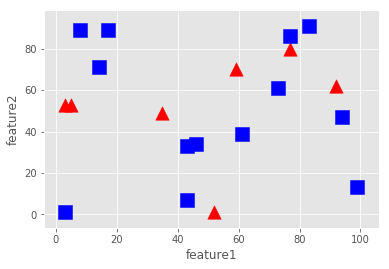

In [36]:
plot_data(red,blue)

In [37]:
knn=cv2.ml.KNearest_create()

In [38]:
labels.ravel()==0

array([ True, False,  True, False,  True,  True, False, False,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True])

In [39]:
knn.train(train_data, cv2.ml.ROW_SAMPLE, labels)


True

In [51]:
newcomer,_=gen_data(1)

In [52]:
newcomer

array([[10., 80.]], dtype=float32)

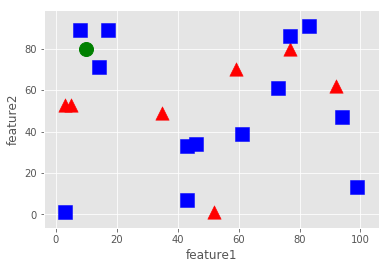

In [53]:
plot_data(red,blue)
plt.plot(newcomer[0,0],newcomer[0,1],'go',markersize=14)

In [59]:
ret, results, neighbor, dist = knn.findNearest(newcomer, 5)
print("Predicted label:\t", results)
print("Neighbor's label:\t", neighbor)
print("Distance to neighbor:\t", dist)

Predicted label:	 [[0.]]
Neighbor's label:	 [[0. 0. 0. 1. 1.]]
Distance to neighbor:	 [[ 85.  97. 130. 754. 778.]]
